In [ ]:
import pandas as pd

In [ ]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

In [ ]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [ ]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [ ]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret['daily_return']=strategy_ret['Adj Close'].pct_change()
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [ ]:
import os
import re
wd = os.getcwd()
os.chdir(wd)

#os.chdir('results')

def get_account_value(model_name):
    os.chdir('C:\\Users\\user\\Documents\\wiki\\wiki\\dev\\python\\python-ml\\code\\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020')
    df_account_value=pd.DataFrame()
    #or i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    for i in range(rebalance_window+validation_window, 1260,rebalance_window):
        #print(i)
        #all_data = pd.read_csv(re.sub('code', 'data', wd)+"\\results\\combined_set.csv")
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        #print(temp)
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    #print(df_trade_date[63:])
    #print(df_account_value)
    return df_account_value

## DJIA

In [ ]:
len(unique_trade_date)+1

In [ ]:

#all_data = pd.read_csv(r"C:\Users\User\Documents\wiki\wiki\dev\python\Python-Stock\data\combined_set.csv")

In [ ]:
#all_data.index = all_data['Date']

In [ ]:
#all_data.describe()
#for i in all_data.columns:
#    print(i)

In [ ]:
#rebalance_window+validation_window

In [ ]:
#len(unique_trade_date)+1

In [ ]:
#rebalance_window

In [ ]:
os.chdir('C:\\Users\\user\\Documents\\wiki\\wiki\\dev\\python\\python-ml\\code\\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020')
#os.chdir('results')
dji = pd.read_csv("data/^DJI.csv")

test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [ ]:
#dji

In [ ]:
test_dji.shape

In [ ]:
test_dji.head()

In [ ]:
#test_dji = all_data[['EWJ']].pct_change(1)

In [ ]:
dow_strat = backtest_strat(test_dji)

## Ensemble Strategy

In [ ]:
#df=test_dji#.set_index('Date')#
df = pd.read_csv('data/dow_30_2009_2020.csv')#.set_index('datadate')

In [ ]:
df.index = pd.to_datetime(df['datadate'],format='%Y%m%d')

In [ ]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.index > '2015-10-01')&(df.index <= '2020-07-07')]


In [ ]:
df_trade_date = pd.DataFrame(unique_trade_date)

In [ ]:
ensemble_account_value = get_account_value('ensemble')

In [ ]:
ensemble_account_value

<AxesSubplot:>

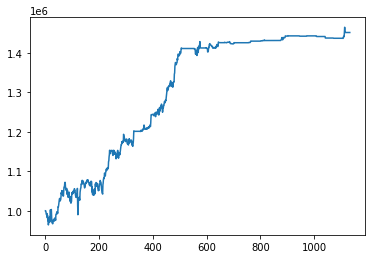

In [61]:
ensemble_account_value.account_value.plot()

In [62]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.294860392527089


In [63]:
test_dji

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
...,...,...,...,...,...,...,...
1126,2020-06-24,25992.960938,25992.960938,25296.730469,25445.939453,25445.939453,450120000
1127,2020-06-25,25365.220703,25769.609375,25209.789063,25745.599609,25745.599609,384560000
1128,2020-06-26,25641.689453,25641.689453,24971.029297,25015.550781,25015.550781,640860000
1129,2020-06-29,25152.449219,25601.150391,25096.160156,25595.800781,25595.800781,378070000


In [64]:
ensemble_account_value['Date'] = test_dji['Date']

In [65]:
ensemble_account_value.head()

,account_value,Unnamed: 0,prcod,prchd,prcld,prccd,cshtrd,Dividends,Stock Splits,tic,high_abband,low_abband,ajexdi,datadate,daily_return,Date
0,1000000.000000,1790,101.280998,101.695627,100.088952,101.566055,9995000,0.0,0.0,MCD,103.659424,103.037830,1,20160104,NaN,2016-01-04
1,999881.566486,1791,101.419198,102.991320,101.315539,102.965401,6314000,0.0,0.0,MCD,103.705033,102.778158,1,20160105,-0.000118,2016-01-05
2,996852.679015,1792,101.928853,103.025881,101.764728,102.274376,6543800,0.0,0.0,MCD,103.695482,102.899073,1,20160106,-0.003029,2016-01-06
3,992275.845686,1793,101.445109,101.902924,99.847067,99.907539,7477900,0.0,0.0,MCD,103.631158,102.813648,1,20160107,-0.004591,2016-01-07
4,989864.506388,1794,99.985276,101.471020,99.562014,99.752052,6103400,0.0,0.0,MCD,103.611573,102.734118,1,20160108,-0.002430,2016-01-08


In [73]:
ensemble_account_value.columns=['account_value', 'Index', 'prcod', 'prchd', 'prcld', 'Adj Close',\
       'cshtrd', 'Dividends', 'Stock Splits', 'tic', 'high_abband',\
       'low_abband', 'ajexdi', 'datadate', 'daily_return', 'Date']

In [74]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [ ]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,12.619%
Cumulative returns,67.753%
Annual volatility,23.619%
Sharpe ratio,0.62
Calmar ratio,0.34
Stability,0.88
Max drawdown,-36.899%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,36.90,2019-09-06,2020-03-23,NaT,NaN
1,16.34,2018-01-26,2018-03-02,2018-10-23,193
2,14.70,2016-05-10,2016-10-20,2017-02-24,209
3,9.67,2018-11-30,2018-12-24,2019-03-26,83
4,7.39,2016-02-01,2016-02-05,2016-03-18,35


c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\u

Stress Events,mean,min,max
New Normal,0.06%,-15.88%,18.13%


c:\users\user\appdata\local\programs\python\python39\jupyterlab\lib\site-packages\pandas\core\indexes\base.py:5278: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


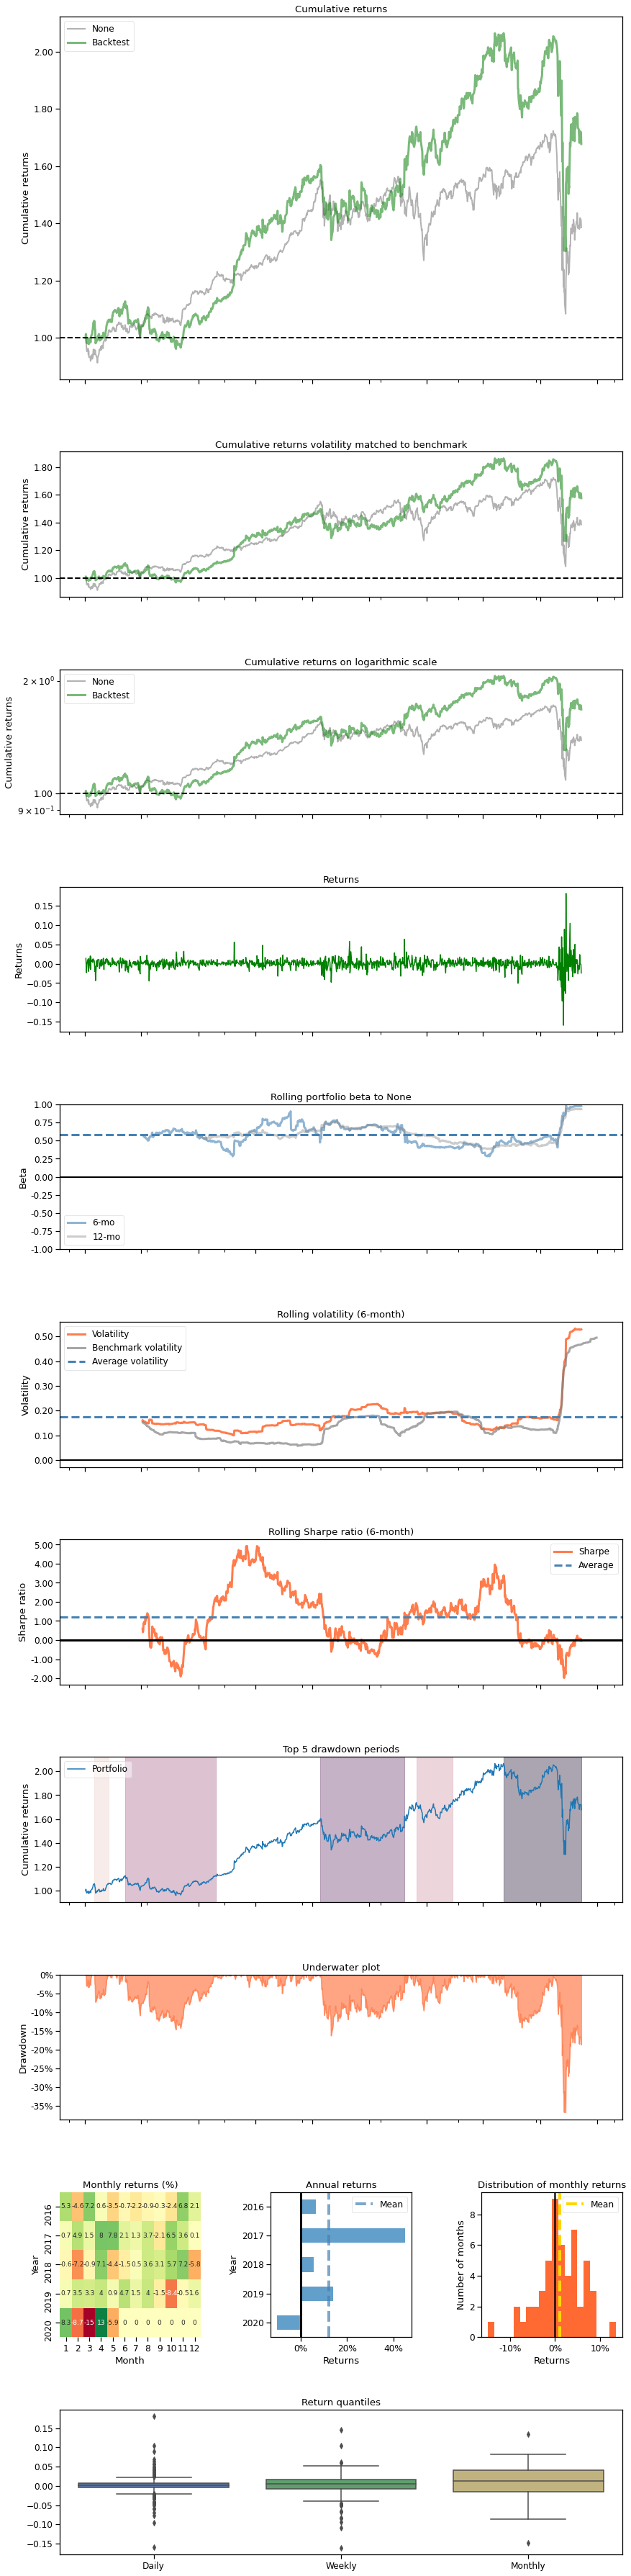

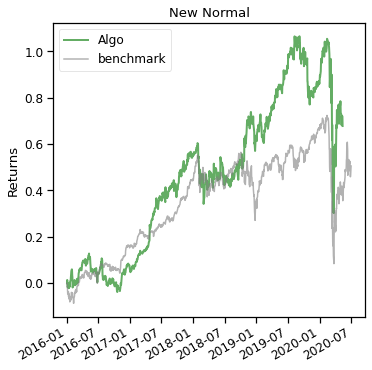

In [75]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)